In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
df=pd.read_csv('/content/drive/MyDrive/uas/ObesityDataSet.csv')

In [3]:
 df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [4]:
# Display general information and the first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


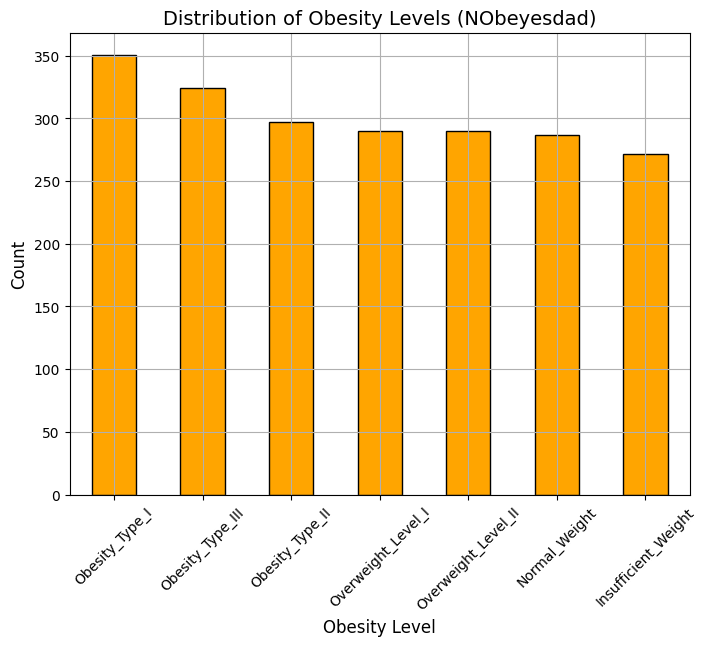

In [5]:
# Visualize the distribution of the 'NObeyesdad' column (target variable)
plt.figure(figsize=(8, 6))
df['NObeyesdad'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Distribution of Obesity Levels (NObeyesdad)', fontsize=14)
plt.xlabel('Obesity Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [6]:
# Check for missing values
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [7]:
df.nunique()

,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


In [8]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(18)

In [9]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

,0
Age,22
Gender,22
Height,22
Weight,19
CALC,20
FAVC,22
FCVC,18
NCP,22
SCC,18
SMOKE,13


In [10]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

,0
Age,1215
Gender,2
Height,1361
Weight,1321
CALC,4
FAVC,2
FCVC,702
NCP,551
SCC,2
SMOKE,2


In [13]:
for col in df.select_dtypes(include='object').columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='raise')
    except ValueError:
        pass
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1793 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1793 non-null   float64
 1   Gender                          1793 non-null   object 
 2   Height                          1793 non-null   float64
 3   Weight                          1793 non-null   float64
 4   CALC                            1793 non-null   object 
 5   FAVC                            1793 non-null   object 
 6   FCVC                            1793 non-null   float64
 7   NCP                             1793 non-null   float64
 8   SCC                             1793 non-null   object 
 9   SMOKE                           1793 non-null   object 
 10  CH2O                            1793 non-null   float64
 11  family_history_with_overweight  1793 non-null   object 
 12  FAF                             1793 no

In [14]:

# Dictionary untuk menyimpan encoder fitur kategorikal (selain target)
label_encoders = {}

# Encode semua fitur kategorikal kecuali target
for col in df.select_dtypes(include='object').columns:
    if col != 'NObeyesdad':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Simpan encoder fitur untuk kebutuhan inverse_transform

for col, le in label_encoders.items():
    print(f"Encoding kolom {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")
# ===============================
# Encode target (NObeyesdad) secara terpisah
# ===============================
le_target = LabelEncoder()
df['NObeyesdad'] = le_target.fit_transform(df['NObeyesdad'])

# Cek hasil DataFrame
df.info()

# Tampilkan urutan encoding target
print("Encoding target (NObeyesdad):")
for i, label in enumerate(le_target.classes_):
    print(f"{i} => {label}")

# Simpan encoder target (benar)
joblib.dump(le_target, "label_encoder_target.pkl")

# Cek label yang dikenali oleh encoder target
print("Label dikenali oleh encoder target:", list(le_target.classes_))


Encoding kolom Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Encoding kolom CALC: {'Always': np.int64(0), 'Frequently': np.int64(1), 'Sometimes': np.int64(2), 'no': np.int64(3)}
Encoding kolom FAVC: {'no': np.int64(0), 'yes': np.int64(1)}
Encoding kolom SCC: {'no': np.int64(0), 'yes': np.int64(1)}
Encoding kolom SMOKE: {'no': np.int64(0), 'yes': np.int64(1)}
Encoding kolom family_history_with_overweight: {'no': np.int64(0), 'yes': np.int64(1)}
Encoding kolom CAEC: {'Always': np.int64(0), 'Frequently': np.int64(1), 'Sometimes': np.int64(2), 'no': np.int64(3)}
Encoding kolom MTRANS: {'Automobile': np.int64(0), 'Bike': np.int64(1), 'Motorbike': np.int64(2), 'Public_Transportation': np.int64(3), 'Walking': np.int64(4)}
<class 'pandas.core.frame.DataFrame'>
Index: 1793 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1793 no

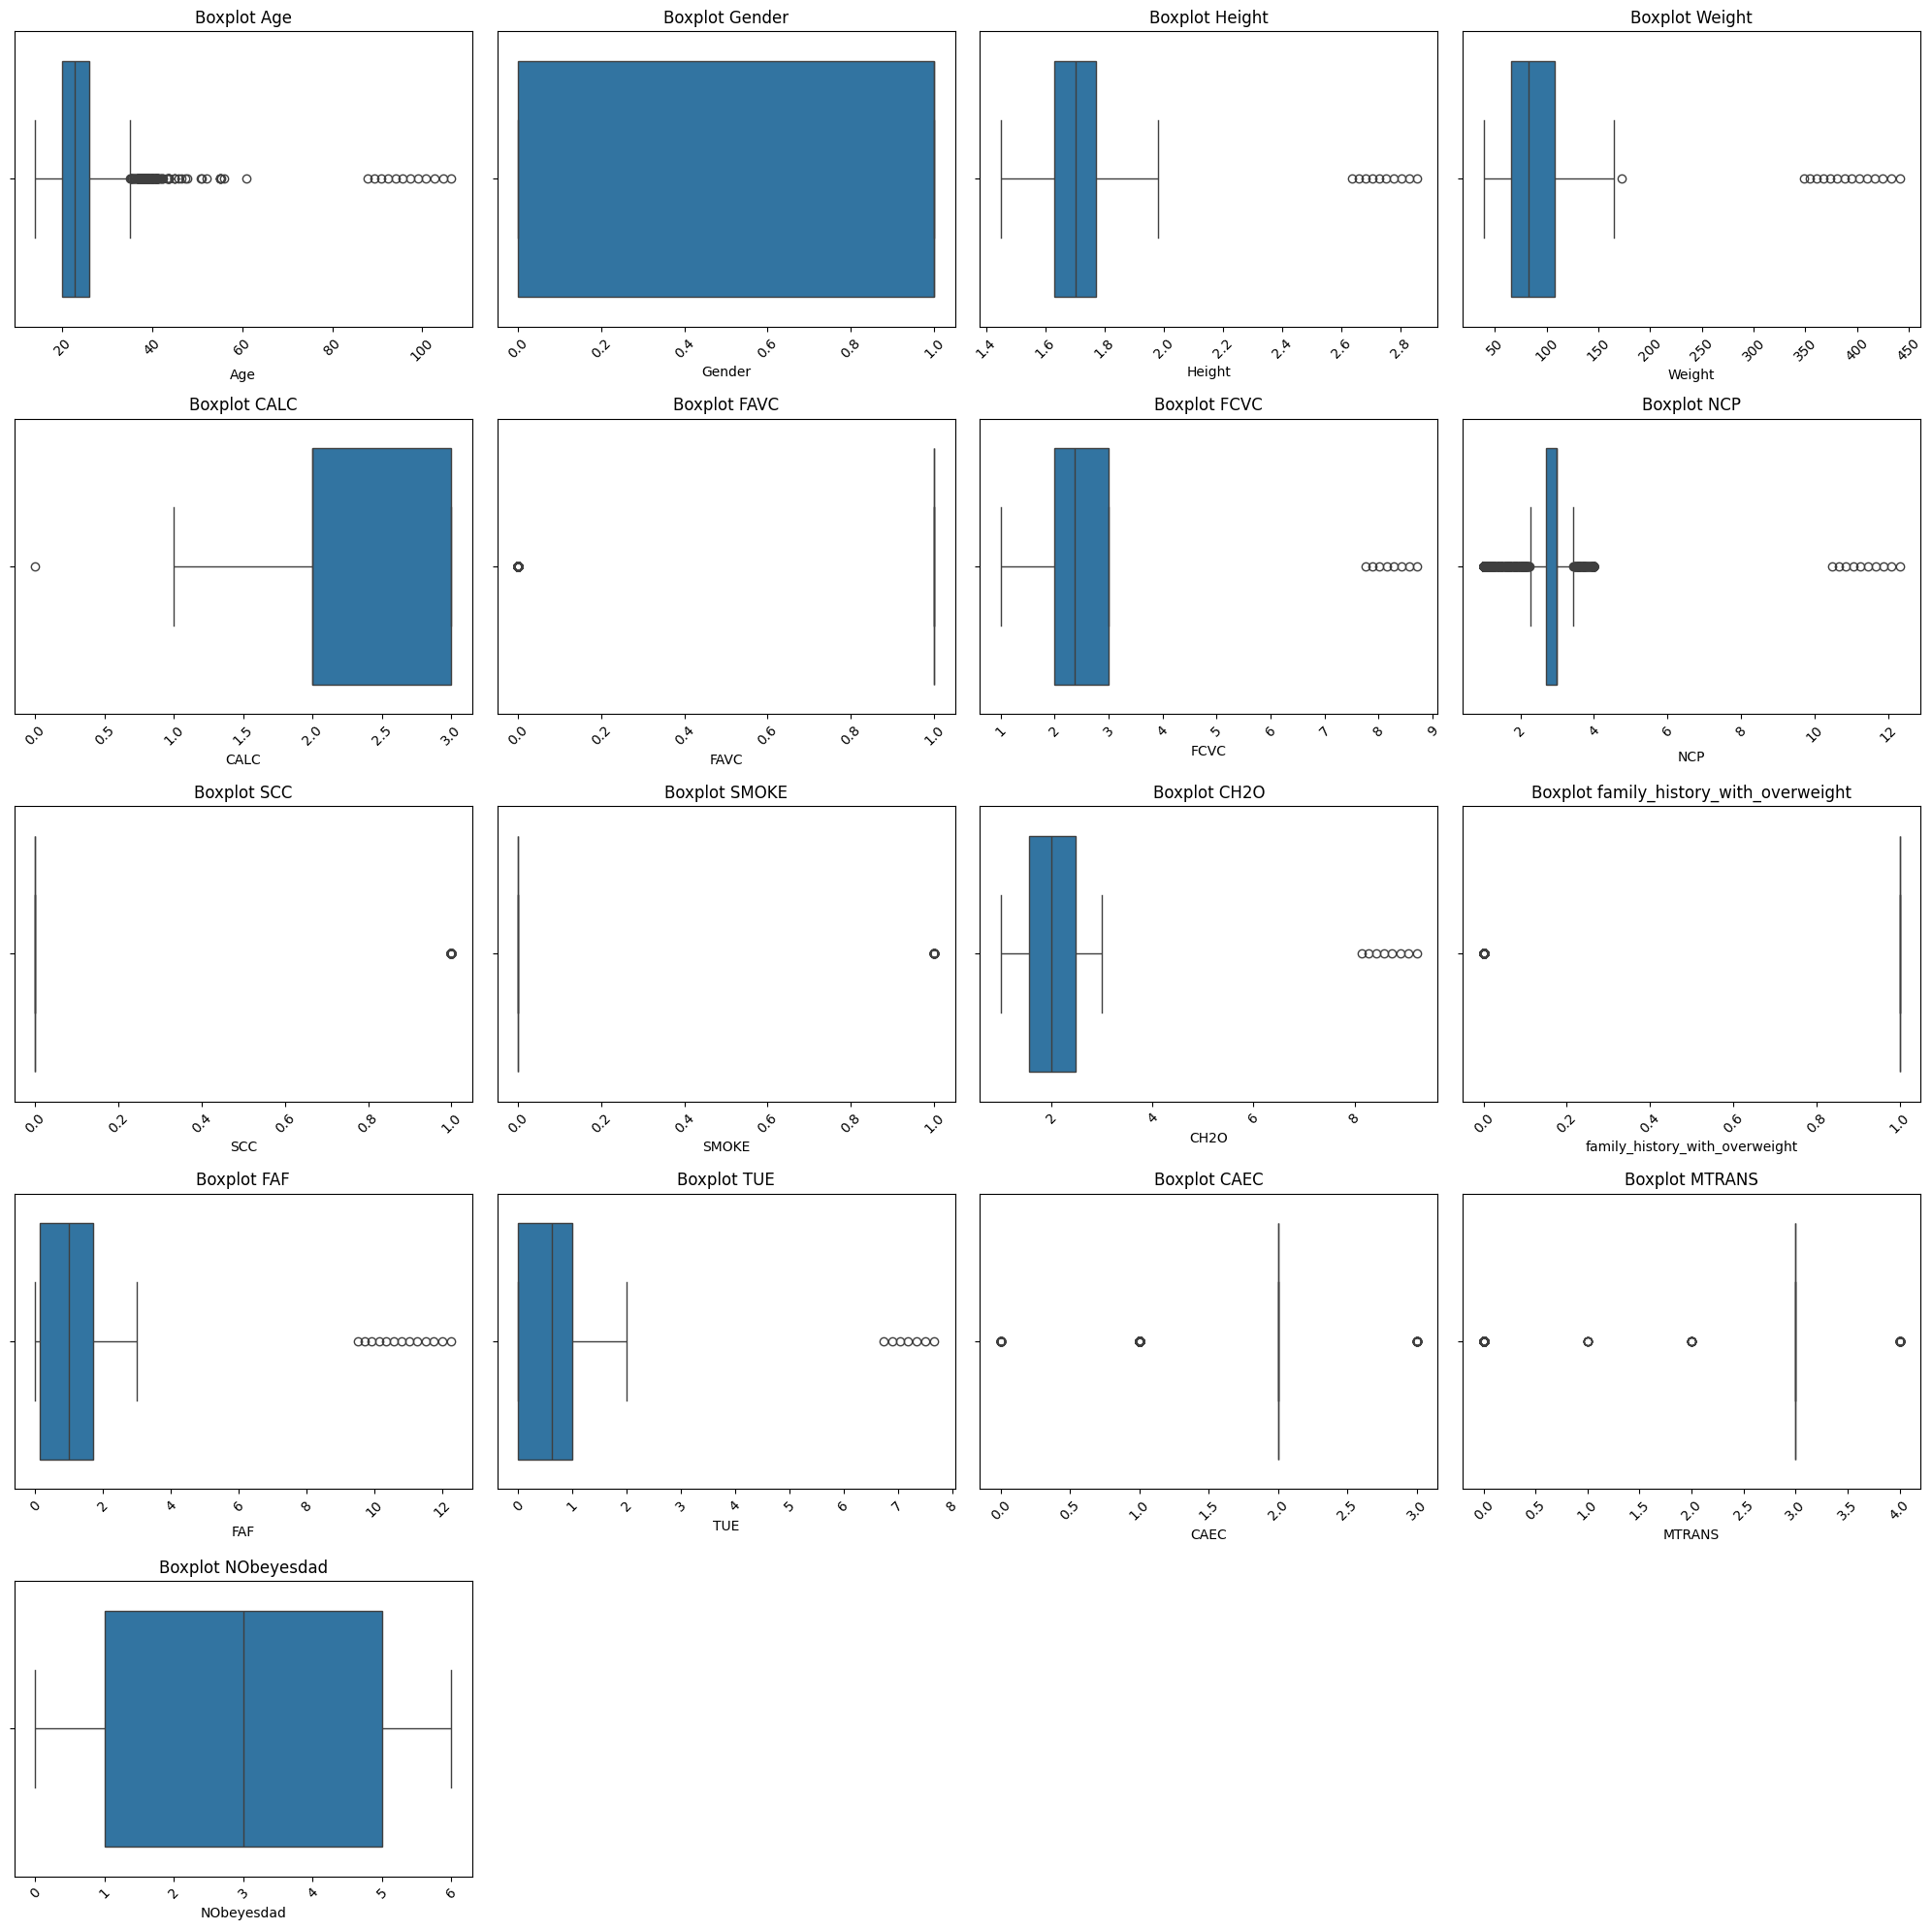

In [15]:
# Check if the dataset has numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# If there are numerical columns, proceed with the plotting
if len(numeric_cols) > 0:
    n_cols = 4
    n_plots = len(numeric_cols)
    import math
    n_rows = math.ceil(n_plots / n_cols)

    # Create grid subplot
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()  # so that it can be accessed with a 1D index

    # Loop and create boxplots for each subplot
    for i, col in enumerate(numeric_cols):
        sns.boxplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'Boxplot {col}')
        axes[i].tick_params(axis='x', rotation=45)

    # Remove any empty subplot if there are fewer plots than subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns detected in the dataset.")

In [16]:
# Gunakan applymap untuk membersihkan string di setiap sel (bukan .map pada DataFrame secara langsung)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Label encode semua kolom kategorikal
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Hitung korelasi semua kolom dengan kolom target 'NObeyesdad'
correlation_with_target = df.corr(numeric_only=True)['NObeyesdad'].sort_values(ascending=False)

correlation_with_target

/tmp/ipython-input-16-4208892824.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,NObeyesdad
NObeyesdad,1.000000
family_history_with_overweight,0.338769
CAEC,0.312018
Weight,0.286062
Age,0.196274
CH2O,0.053319
Height,0.047111
FAVC,0.046121
Gender,0.032136
FCVC,0.010639


In [17]:
# Tentukan kolom numerik (setelah konversi ordinal jika diperlukan)
df_temp = df.copy()
for col in df_temp.select_dtypes(include='object').columns:
    df_temp[col] = df_temp[col].astype('category').cat.codes

numerical_features = df_temp.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Hitung korelasi Spearman terhadap kolom target
corr = df_temp[numerical_features].corr(method='spearman')
print("Spearman Correlation Result")
print(corr['NObeyesdad'].sort_values(ascending=False))

Spearman Correlation Result
NObeyesdad                        1.000000
Weight                            0.407161
CAEC                              0.344229
family_history_with_overweight    0.343676
Age                               0.284745
CH2O                              0.081677
Height                            0.063461
FAVC                              0.052911
Gender                            0.030644
FCVC                              0.027024
SMOKE                            -0.022743
SCC                              -0.039730
TUE                              -0.056399
MTRANS                           -0.059931
FAF                              -0.121142
NCP                              -0.129968
CALC                             -0.147706
Name: NObeyesdad, dtype: float64


In [18]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

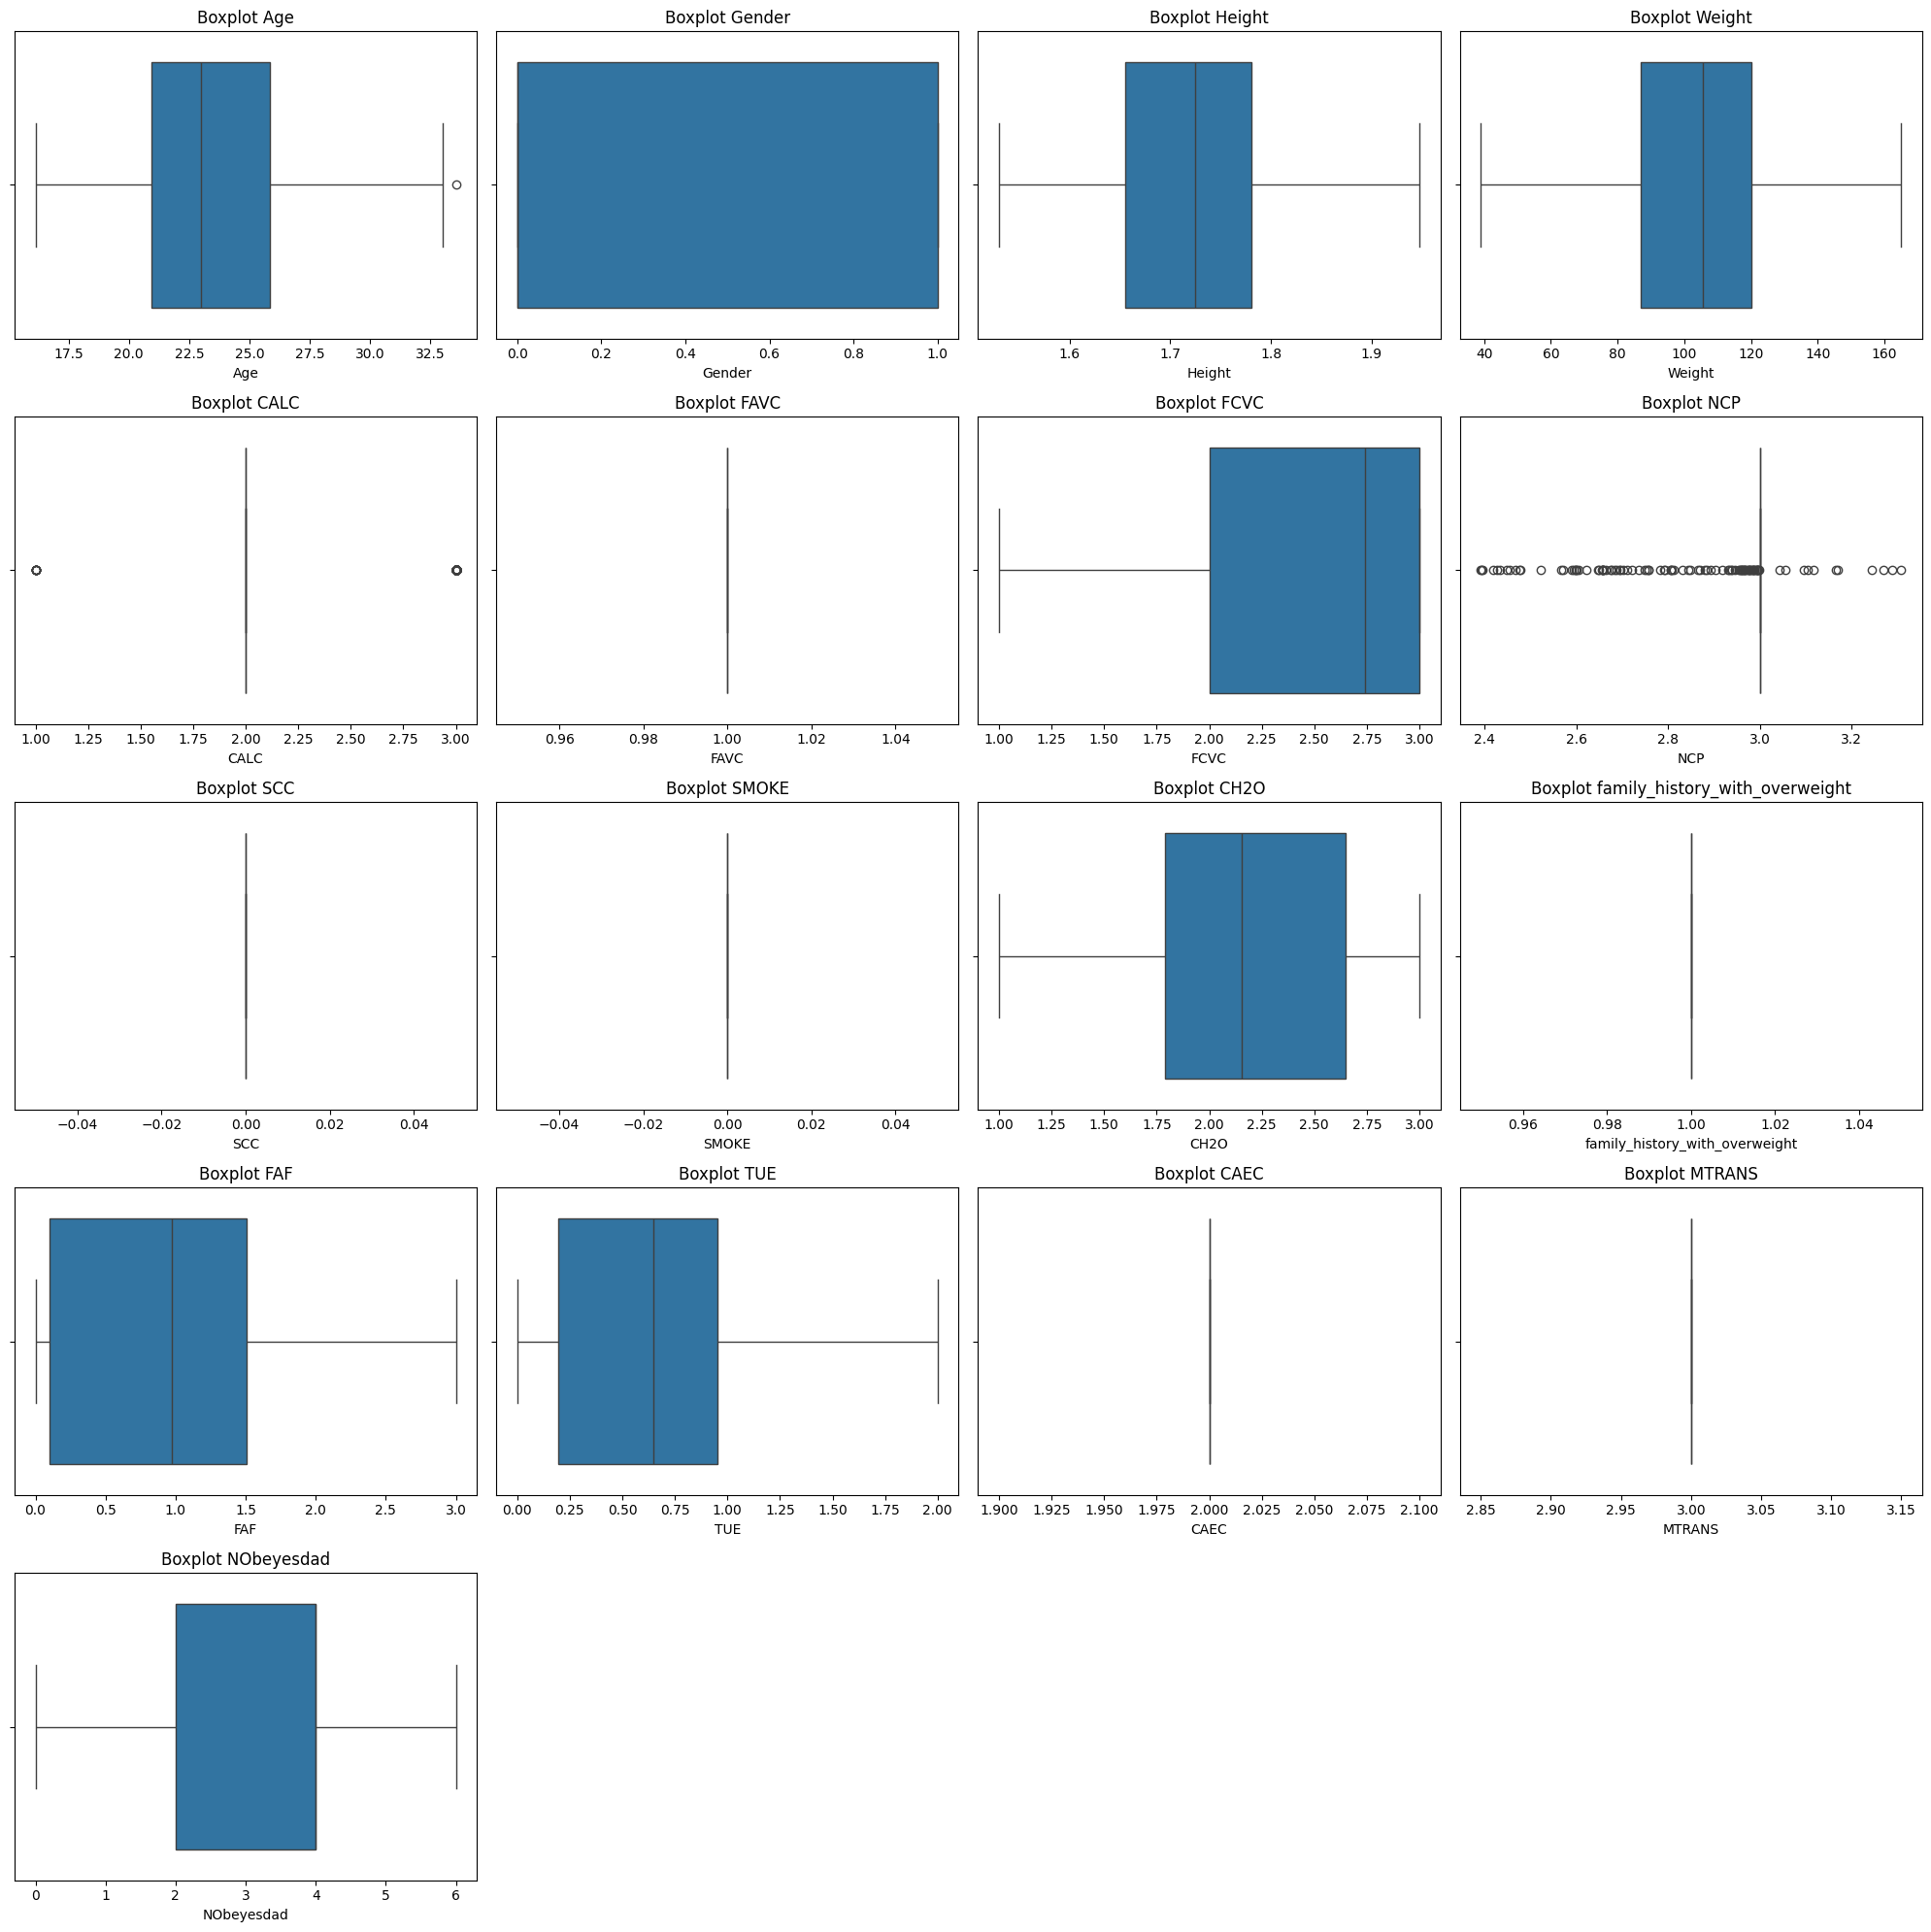

In [19]:
# Gunakan DataFrame hasil drop kolom (pastikan ini DataFrame terbaru)
df_used = df_temp  # atau df_filtered jika kamu pakai nama itu

# Deteksi ulang kolom numerik dari df_used
numeric_cols = df_used.select_dtypes(include=['float64', 'int64']).columns

n_cols = 4
n_plots = len(numeric_cols)
n_rows = math.ceil(n_plots / n_cols)

# Buat grid subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # agar bisa diakses dengan 1D index

# Loop dan buat boxplot di tiap subplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')
    axes[i].tick_params(axis='x')

# Hapus subplot kosong jika ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [27]:
# Pisahkan fitur dan target
X = df_used.drop('NObeyesdad', axis=1)
y = df_used['NObeyesdad']

# =============================
# 4. Atasi Ketidakseimbangan Kelas dengan SMOTE
# =============================
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# =============================
# 5. Normalisasi / Standarisasi dengan StandardScaler
# =============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Konversi kembali ke DataFrame jika diperlukan
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
plt.figure(figsize=(8, 5))


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

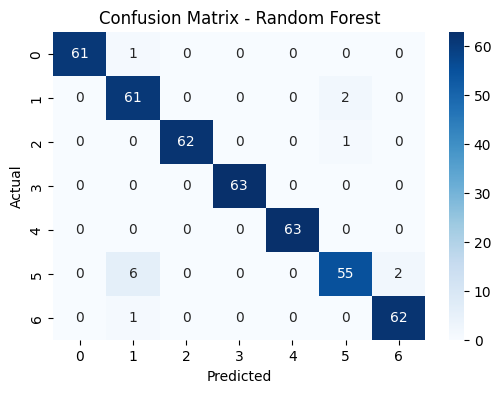


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.88      0.97      0.92        63
           2       1.00      0.98      0.99        63
           3       1.00      1.00      1.00        63
           4       1.00      1.00      1.00        63
           5       0.95      0.87      0.91        63
           6       0.97      0.98      0.98        63

    accuracy                           0.97       440
   macro avg       0.97      0.97      0.97       440
weighted avg       0.97      0.97      0.97       440



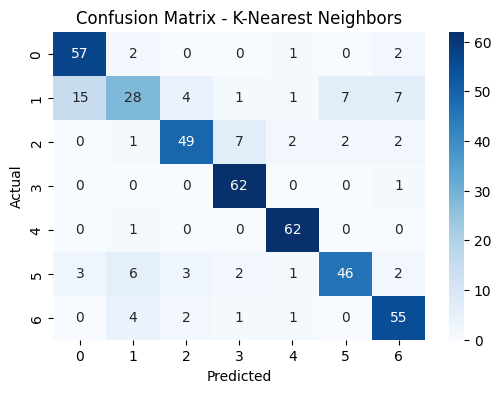


Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        62
           1       0.67      0.44      0.53        63
           2       0.84      0.78      0.81        63
           3       0.85      0.98      0.91        63
           4       0.91      0.98      0.95        63
           5       0.84      0.73      0.78        63
           6       0.80      0.87      0.83        63

    accuracy                           0.82       440
   macro avg       0.81      0.82      0.81       440
weighted avg       0.81      0.82      0.81       440



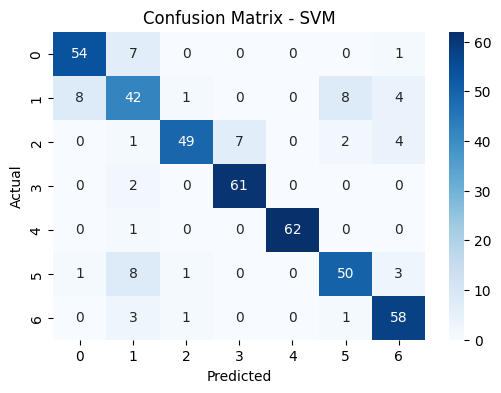


Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        62
           1       0.66      0.67      0.66        63
           2       0.94      0.78      0.85        63
           3       0.90      0.97      0.93        63
           4       1.00      0.98      0.99        63
           5       0.82      0.79      0.81        63
           6       0.83      0.92      0.87        63

    accuracy                           0.85       440
   macro avg       0.86      0.85      0.85       440
weighted avg       0.86      0.85      0.85       440



<Figure size 1000x600 with 0 Axes>

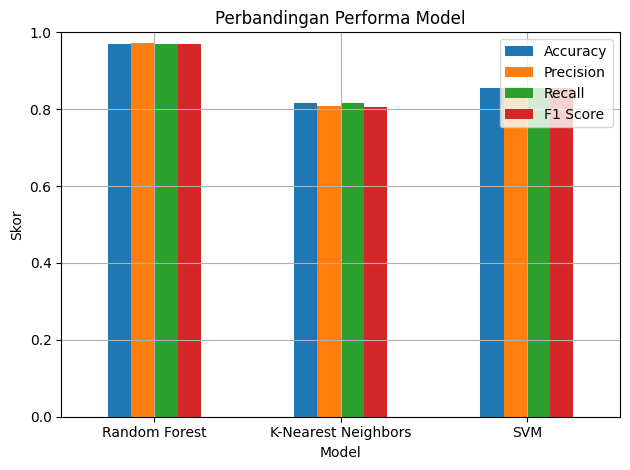

In [21]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Inisialisasi model
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC()
}

# Untuk menyimpan hasil evaluasi
results = []

# Loop setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print classification report
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

# Buat DataFrame dari hasil evaluasi
results_df = pd.DataFrame(results)

# Visualisasi perbandingan
plt.figure(figsize=(10, 6))
results_df.set_index('Model').plot(kind='bar', rot=0)
plt.title('Perbandingan Performa Model')
plt.ylabel('Skor')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

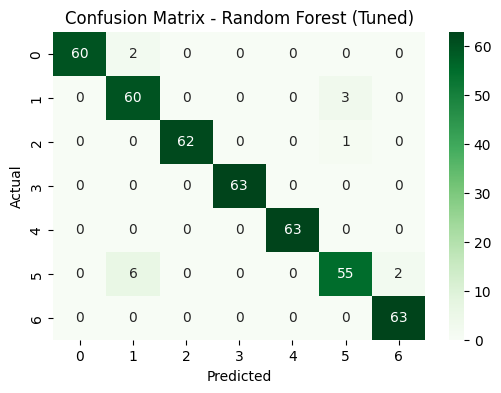


Classification Report for Random Forest (Tuned):

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        62
           1       0.88      0.95      0.92        63
           2       1.00      0.98      0.99        63
           3       1.00      1.00      1.00        63
           4       1.00      1.00      1.00        63
           5       0.93      0.87      0.90        63
           6       0.97      1.00      0.98        63

    accuracy                           0.97       440
   macro avg       0.97      0.97      0.97       440
weighted avg       0.97      0.97      0.97       440



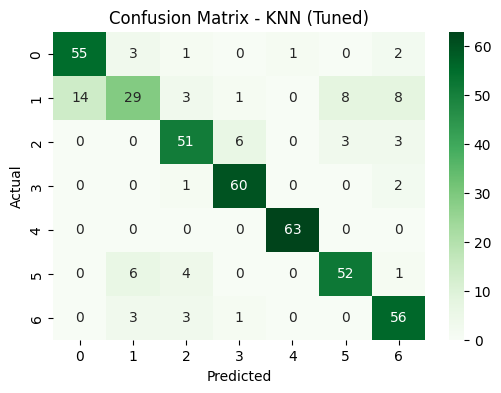


Classification Report for KNN (Tuned):

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        62
           1       0.71      0.46      0.56        63
           2       0.81      0.81      0.81        63
           3       0.88      0.95      0.92        63
           4       0.98      1.00      0.99        63
           5       0.83      0.83      0.83        63
           6       0.78      0.89      0.83        63

    accuracy                           0.83       440
   macro avg       0.83      0.83      0.82       440
weighted avg       0.83      0.83      0.82       440



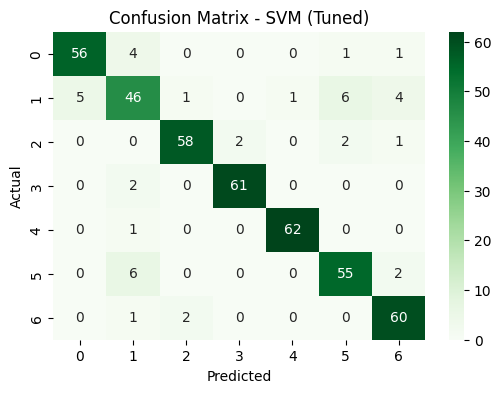


Classification Report for SVM (Tuned):

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        62
           1       0.77      0.73      0.75        63
           2       0.95      0.92      0.94        63
           3       0.97      0.97      0.97        63
           4       0.98      0.98      0.98        63
           5       0.86      0.87      0.87        63
           6       0.88      0.95      0.92        63

    accuracy                           0.90       440
   macro avg       0.90      0.90      0.90       440
weighted avg       0.90      0.90      0.90       440



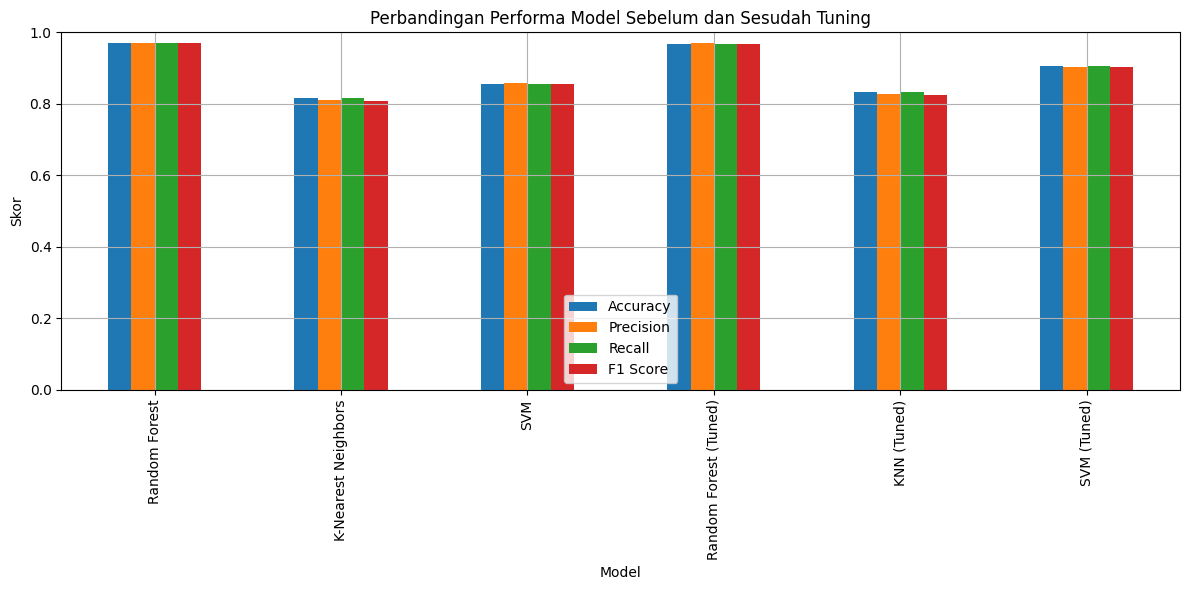

In [22]:

# Dictionary untuk menyimpan hasil setelah tuning
tuned_results = []
best_models = {}

# ======================
# Random Forest Tuning
# ======================
param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=3, scoring='f1_weighted')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
best_models['Random Forest (Tuned)'] = best_rf

# ======================
# KNN Tuning
# ======================
param_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=3, scoring='f1_weighted')
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
best_models['KNN (Tuned)'] = best_knn

# ======================
# SVM Tuning
# ======================
param_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
grid_svm = GridSearchCV(SVC(), param_svm, cv=3, scoring='f1_weighted')
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
best_models['SVM (Tuned)'] = best_svm

# ======================
# Evaluasi Ulang Setelah Tuning
# ======================
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    tuned_results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

# ======================
# Visualisasi Sebelum vs Sesudah Tuning
# ======================
# Gabungkan hasil evaluasi
before_df = results_df.copy()
after_df = pd.DataFrame(tuned_results)

# Gabungkan kedua hasil
combined = pd.concat([before_df.set_index('Model'), after_df.set_index('Model')])
combined.plot(kind='bar', figsize=(12, 6), ylim=(0, 1))
plt.title('Perbandingan Performa Model Sebelum dan Sesudah Tuning')
plt.ylabel('Skor')
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
import joblib
# Save model & scaler
joblib.dump(best_rf, "random_forest_model.pkl")
# Saat preprocessing / training
X = df.drop('NObeyesdad', axis=1)
X_columns = X.columns.tolist()

scaler = StandardScaler()
scaler.fit(X)

# Simpan scaler dan urutan kolom
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X_columns, 'scaler_columns.pkl')
df['FCVC'].describe()
df_temp.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1793 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1793 non-null   float64
 1   Gender                          1793 non-null   int64  
 2   Height                          1793 non-null   float64
 3   Weight                          1793 non-null   float64
 4   CALC                            1793 non-null   int64  
 5   FAVC                            1793 non-null   int64  
 6   FCVC                            1793 non-null   float64
 7   NCP                             1793 non-null   float64
 8   SCC                             1793 non-null   int64  
 9   SMOKE                           1793 non-null   int64  
 10  CH2O                            1793 non-null   float64
 11  family_history_with_overweight  1793 non-null   int64  
 12  FAF                             1793 no

In [24]:
# Load model & scaler
model = joblib.load("random_forest_model.pkl")
scaler = joblib.load("scaler.pkl")  # pastikan kamu menyimpan scaler sebelumnya

# Load label encoder target
le_target = joblib.load("label_encoder_target.pkl")

# Kolom fitur harus sama seperti saat training (urutannya penting!)
X_columns = [
    'Age',
    'Gender',
    'Height',
    'Weight',
    'CALC',
    'FAVC',
    'FCVC',
    'NCP',
    'SCC',
    'SMOKE',
    'CH2O',
    'family_history_with_overweight',
    'FAF',
    'TUE',
    'CAEC',
    'MTRANS'
]

# Contoh input data baru (urutan HARUS sesuai dengan kolom di atas!)
sample = np.array([[25, 1, 1.5, 1000, 0, 0, 3, 3, 1, 1, 3, 1, 1, 3.0, 0, 0]])

# Bungkus ke dalam DataFrame agar nama kolom sesuai
sample_df = pd.DataFrame(sample, columns=X_columns)

# Scaling dan prediksi
sample_scaled = scaler.transform(sample_df)
prediction = model.predict(sample_scaled)

# Inverse transform ke label asli
predicted_label = le_target.inverse_transform(prediction)

print("Prediksi kelas (angka):", prediction[0])
print("Prediksi kelas (label):", predicted_label[0])


Prediksi kelas (angka): 3
Prediksi kelas (label): Obesity_Type_II


In [25]:
df_temp.info()
print(df['NObeyesdad'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 1793 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1793 non-null   float64
 1   Gender                          1793 non-null   int64  
 2   Height                          1793 non-null   float64
 3   Weight                          1793 non-null   float64
 4   CALC                            1793 non-null   int64  
 5   FAVC                            1793 non-null   int64  
 6   FCVC                            1793 non-null   float64
 7   NCP                             1793 non-null   float64
 8   SCC                             1793 non-null   int64  
 9   SMOKE                           1793 non-null   int64  
 10  CH2O                            1793 non-null   float64
 11  family_history_with_overweight  1793 non-null   int64  
 12  FAF                             1793 no